In [366]:
import pandas as pd
import numpy as np

In [394]:
import os
import tarfile
from six.moves import urllib

In [630]:
import warnings
warnings.filterwarnings("ignore")

In [776]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [777]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [778]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [779]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [780]:
df = load_housing_data()

In [781]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [782]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [783]:
# X = df[~('median_house_value')]

In [784]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [785]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [786]:
import matplotlib.pyplot as plt

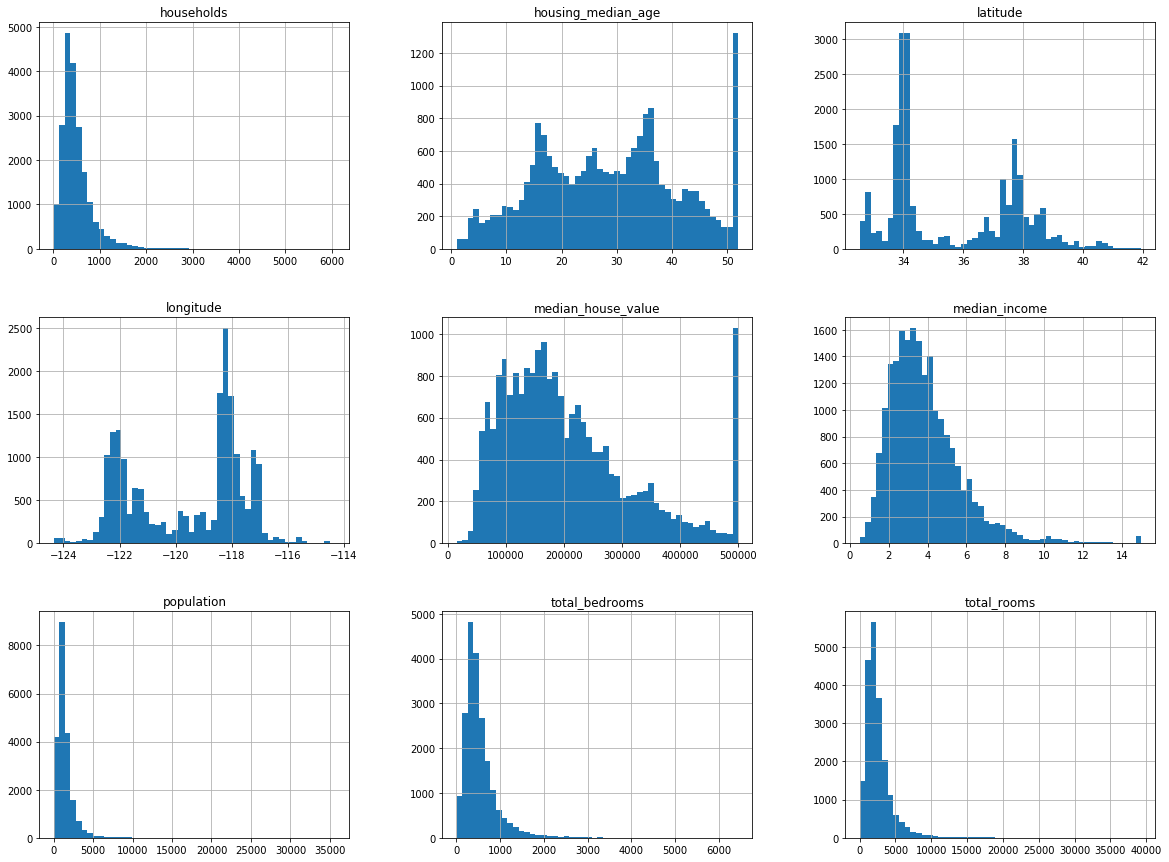

In [787]:
df.hist(bins=50, figsize=(20,15));

In [788]:
from sklearn.model_selection import train_test_split

In [849]:
## Income category will be used only to split our data wrt income categorya then it will be removed

df['income_cat'] = np.ceil(df['median_income']/1.5) # median incomes are divided into 5 categories
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace=True) # if it is equal or greater than 5, then it is labedl as 5.0

In [850]:
# df['age_cat'] = np.ceil(df['housing_median_age']/10)
# df['age_cat'].where(df['age_cat']<=5, 6.0, inplace=True)

In [851]:
df['median_income'].mean()

3.8706710029070246

In [852]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [853]:
#y = df[['median_house_value']].values

In [854]:
df1 = df.copy()

In [855]:
#df1.drop('median_house_value', axis=1, inplace=True)

In [856]:
X = df1

In [857]:

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

In [858]:
# we stratify according to income_cat so we expect the income cat should be equally distributed in train and test set
## We will not split y_train and y_test yet but later

X_train, X_test = train_test_split(X, stratify=X['income_cat'], random_state=33, train_size=0.2)

In [859]:
X.income_cat.value_counts()/len(X)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [860]:
X_train.income_cat.value_counts()/len(X_train)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [861]:
X_test.income_cat.value_counts()/len(X_test)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: income_cat, dtype: float64

In [862]:
## now we can remove income category form data_set and get the original dataset

for dataset in (X_train, X_test):
    dataset.drop(['income_cat'], axis=1, inplace=True)

In [863]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15130,-116.91,32.86,15.0,3153.0,628.0,1633.0,527.0,3.6898,131000.0,<1H OCEAN
4965,-118.29,34.00,6.0,1487.0,468.0,1509.0,403.0,1.4639,112500.0,<1H OCEAN
18531,-122.02,36.98,35.0,1053.0,263.0,552.0,237.0,2.7125,217500.0,NEAR OCEAN
8127,-118.16,33.80,9.0,3564.0,835.0,1530.0,807.0,5.1806,175000.0,NEAR OCEAN
3959,-118.60,34.20,10.0,2869.0,941.0,2162.0,829.0,3.2297,150000.0,<1H OCEAN


In [864]:
## Our original traning set X_train will be inact so we copy it
X_train1 = X_train.copy()

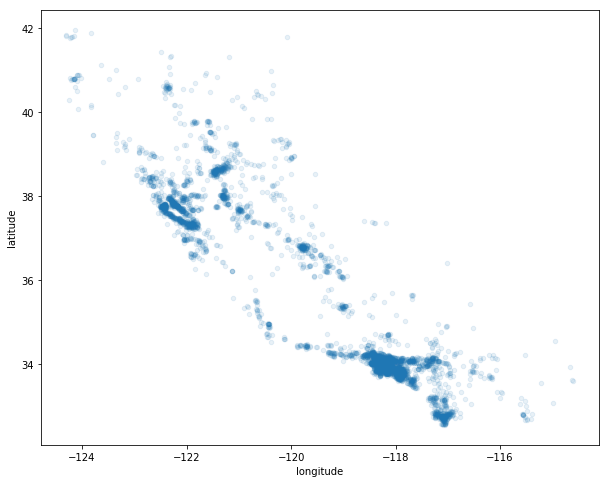

In [865]:
plt.rcParams["figure.figsize"] = (10,8)
X_train1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

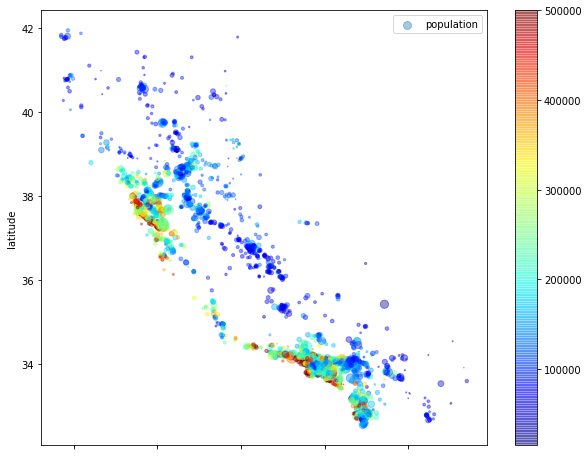

In [866]:
# color will represent price and circle size will be population
plt.rcParams["figure.figsize"] = (10,8)
X_train1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=X_train1['population']/100, label='population',
             c=X_train1['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True);
             #c=y_train.reshape(-1), cmap=plt.get_cmap('jet'), colorbar=True);
plt.legend()

In [867]:
corr_matrix = X_train1.corr()

In [868]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.680137
total_rooms           0.148733
housing_median_age    0.110337
households            0.071603
total_bedrooms        0.052584
population           -0.019755
longitude            -0.043142
latitude             -0.155736
Name: median_house_value, dtype: float64

In [869]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.920626,-0.099541,0.048151,0.073787,0.106876,0.055167,-0.008121,-0.043142
latitude,-0.920626,1.000000,-0.009206,-0.036367,-0.064214,-0.110861,-0.067200,-0.095219,-0.155736
housing_median_age,-0.099541,-0.009206,1.000000,-0.366944,-0.316974,-0.295394,-0.297447,-0.115854,0.110337
total_rooms,0.048151,-0.036367,-0.366944,1.000000,0.929391,0.850597,0.913765,0.206120,0.148733
total_bedrooms,0.073787,-0.064214,-0.316974,0.929391,1.000000,0.880206,0.978732,-0.001016,0.052584
population,0.106876,-0.110861,-0.295394,0.850597,0.880206,1.000000,0.909222,0.016182,-0.019755
households,0.055167,-0.067200,-0.297447,0.913765,0.978732,0.909222,1.000000,0.016733,0.071603
median_income,-0.008121,-0.095219,-0.115854,0.206120,-0.001016,0.016182,0.016733,1.000000,0.680137
median_house_value,-0.043142,-0.155736,0.110337,0.148733,0.052584,-0.019755,0.071603,0.680137,1.000000


In [870]:
from pandas.tools.plotting import scatter_matrix

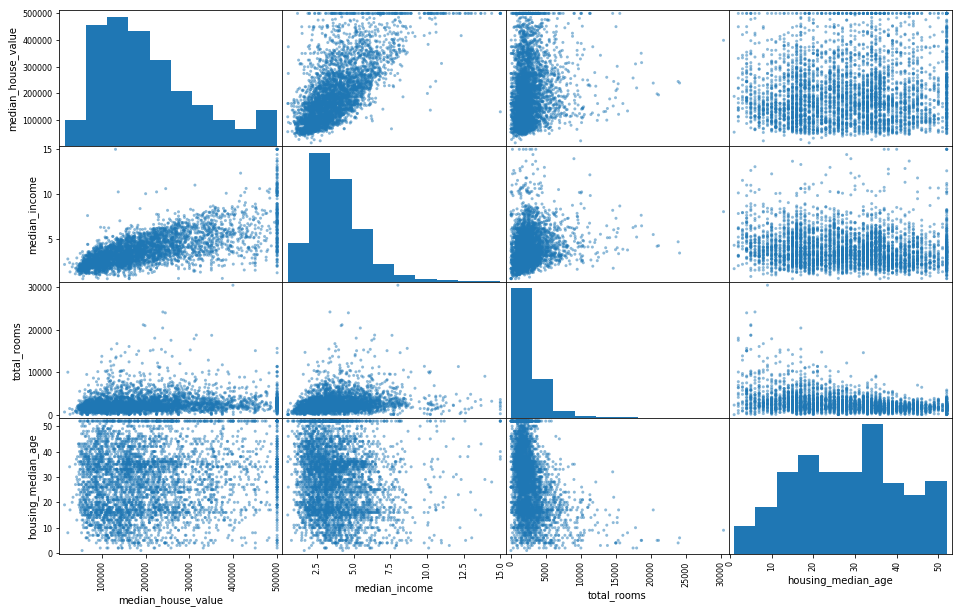

In [871]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
plt.rcParams["figure.figsize"] = (16,10)
scatter_matrix(X_train1[attributes]);

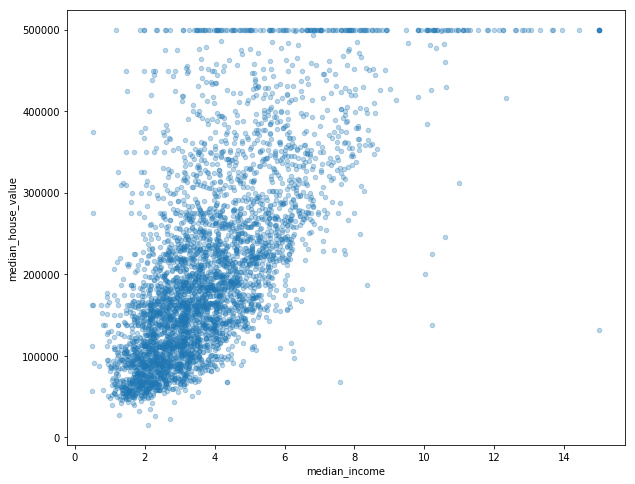

In [872]:
plt.rcParams['figure.figsize'] =(10,8)
X_train1.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.3);

In [873]:
X_train1['rooms_per_household'] = X_train1['total_rooms']/X_train1['households']
X_train1['bedrooms_per_room'] = X_train1['total_bedrooms']/X_train1['total_rooms']
X_train1['population_per_household'] = X_train1['population']/X_train1['households']

In [874]:
corr_matrix = X_train1.corr()

In [875]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.680137
total_rooms                 0.148733
rooms_per_household         0.142979
housing_median_age          0.110337
households                  0.071603
total_bedrooms              0.052584
population                 -0.019755
population_per_household   -0.020207
longitude                  -0.043142
latitude                   -0.155736
bedrooms_per_room          -0.261998
Name: median_house_value, dtype: float64

In [876]:
## DATA PREPERATIONS

In [877]:
y_train = X_train1['median_house_value']
X_train1.drop(['median_house_value'], axis=1, inplace=True)

In [878]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 15130 to 17595
Data columns (total 12 columns):
longitude                   4128 non-null float64
latitude                    4128 non-null float64
housing_median_age          4128 non-null float64
total_rooms                 4128 non-null float64
total_bedrooms              4081 non-null float64
population                  4128 non-null float64
households                  4128 non-null float64
median_income               4128 non-null float64
ocean_proximity             4128 non-null object
rooms_per_household         4128 non-null float64
bedrooms_per_room           4081 non-null float64
population_per_household    4128 non-null float64
dtypes: float64(11), object(1)
memory usage: 419.2+ KB


In [879]:
# We have missing values 

   # If we fill with most frequent value those can be used:
    # X_train1['bedrooms_per_room].fillna(X_train1['bedrooms_per_room'].mode()) veya X_train1['bedrooms_per_room'].fillna(X_train1['bedrooms_per_room'].value_counts().index[0])
    # Butun df icin: df.fillna(df.mode().iloc[0])

In [880]:
X_train1['bedrooms_per_room'].mode()

0    0.166667
dtype: float64

In [881]:
X_train1['bedrooms_per_room'].value_counts().index[0]

0.16666666666666666

In [882]:
## We will use mean to impute

In [883]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

In [884]:
imputer = Imputer(strategy='median')
#pipeline= Pipeline()

In [885]:
X_train1_num = X_train1.drop('ocean_proximity', axis=1)

In [886]:
imputer.fit(X_train1_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [887]:
## The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable 
imputer.statistics_

array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.17100000e+03,  4.11000000e+02,  3.51115000e+00,
        5.24058511e+00,  2.03162434e-01,  2.82336024e+00])

In [888]:
X_train1.median().values

array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.17100000e+03,  4.11000000e+02,  3.51115000e+00,
        5.24058511e+00,  2.03162434e-01,  2.82336024e+00])

In [889]:
X = imputer.transform(X_train1_num)

In [890]:
X_train1_tr = pd.DataFrame(X, columns=X_train1_num.columns)

In [891]:
X_train1_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 11 columns):
longitude                   4128 non-null float64
latitude                    4128 non-null float64
housing_median_age          4128 non-null float64
total_rooms                 4128 non-null float64
total_bedrooms              4128 non-null float64
population                  4128 non-null float64
households                  4128 non-null float64
median_income               4128 non-null float64
rooms_per_household         4128 non-null float64
bedrooms_per_room           4128 non-null float64
population_per_household    4128 non-null float64
dtypes: float64(11)
memory usage: 354.8 KB


In [832]:
## CATEGORICAL FEATURES

In [892]:
from sklearn.preprocessing import LabelEncoder

In [893]:
encoder = LabelEncoder()

In [894]:
X_train1_cat = X_train1['ocean_proximity']

In [895]:
X_train1_cat_encoded = encoder.fit_transform(X_train1_cat)

In [896]:
X_train1_cat_encoded

array([0, 0, 3, ..., 1, 3, 0])

In [897]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'NEAR BAY' 'NEAR OCEAN']


In [898]:
from sklearn.preprocessing import OneHotEncoder

In [899]:
encoder = OneHotEncoder()
X_train1_cat_1h = encoder.fit_transform(X_train1_cat_encoded.reshape(-1,1))

In [900]:
X_train1_cat_1h

<4128x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [901]:
# To convert a numpy array
X_train1_cat_1h.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [843]:
# LabelBinarizer allow us to from LabelEncoder and then 1hotEncoder

In [904]:
from sklearn.preprocessing import MultiLabelBinarizer

In [845]:
encoder = LabelBinarizer()
X_train1_cat_1h = encoder.fit_transform(X_train1_cat)

In [846]:
X_train1_cat_1h

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

In [587]:
# FEATURE SCALING

In [588]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [593]:
num_pipeline = Pipeline([
              ('imputer', Imputer(strategy='median')),
              ('std_scaler', StandardScaler()),])

In [596]:
X_train1_num_tr=num_pipeline.fit_transform(X_train1_num)

In [905]:
cat_pipeline = Pipeline([
               ('multi_label_binarizer', MultiLabelBinarizer()),])

In [611]:
#X_train1_cat_1h = cat_pipeline.fit_transform(X_train1_cat)

## This is not working with sklearn 19.0 but it must work so I will skip this and continue with code

In [906]:
from sklearn.pipeline import FeatureUnion

In [907]:
full_pipeline = FeatureUnion(transformer_list=[
               ("num_pipeline", num_pipeline),
               ('cat_pipeline', cat_pipeline),
])

In [908]:
X_train1_prepared = full_pipeline.fit_transform(X_train1)

ValueError: could not convert string to float: '<1H OCEAN'

In [622]:
X_train1_num_tr.shape

(4128, 11)

In [624]:
 X_train1_cat_1h.shape

(4128, 4)

In [ ]:
pd.DataFrame( X_train1_cat_1h, columns=X_train1_num.columns)

In [903]:
type(X_train1_num_tr)

numpy.ndarray

In [902]:
X_train1_prepared = X_train1_num_tr.join(X_train1_cat_1h)

AttributeError: 'numpy.ndarray' object has no attribute 'join'

In [617]:
## SELECT and TRAIN a model

In [618]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_LR = LinearRegression()
model_LR.fit()